In [28]:
import argparse
import os
from glob import glob
import shutil
import bdpy
from bdpy.fig import makeplots, draw_group_image_set
from bdpy.util import makedir_ifnot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml

In [29]:
save_dir = '../../results/assets/fig02/randomly_selected'
os.makedirs(save_dir, exist_ok=True)

In [30]:
#NSD 
# reported image selection
true_image_dir = '/home/nu/ken.shirakawa/projects/python_KS/python/featanalyze/Analyze_NSD/contents_shared/NSD-stimuli/source_share_test/source/'
true_image_ext = 'png'
recon_image_ext = 'tiff'


true_image_all = list(np.sort((glob(os.path.join(true_image_dir, '*.' + true_image_ext)))))



selected_images =  np.sort(['nsd03050', 'nsd03435', 'nsd05302', 'nsd07008', 'nsd10065', 'nsd22264',
                    'nsd37802' , 'nsd19201', 'nsd26436',  'nsd10007',  'nsd21509',  'nsd67803'
                   ])
true_images = [true_image for true_image in true_image_all  if os.path.basename(true_image).split('.')[0] in selected_images]
print(len(true_images))

12


In [31]:
recon_path_dict = {
    
    "StableDiffusionReconstruction": "/home/nu/data/contents_shared/NSD-stimuli/derivatives/reconstruction/TN_SD_v1_4/img2img/decoded/gen_5_image2imagensd-betasfithrfGLMdenoiseRR_trainnoave_testave_fastl2lir_a1_nsd-betasfithrfGLMdenoiseRR_trainnoave_testave_fastl2lir_a1/nsd-01/streams_early-streams_ventralgen_0/",
    
    "BrainDiffuser": "/home/nu/mtanaka/project/dnn_test/brain_diffuser/reconstruction/derivatives/brain-diffuser/NSD-stimuli/decoded_scaled/NSD_fmriprep_rep3_trialaverage_allvoxel_allunits_fastl2lir_alpha100000/sub-01_beta/NSDgeneral/",
    
    
    "iCNN": "/home/nu/ken.shirakawa/projects/python_KS/python/share_analysis/recon-repro/derivatives/reconstruction/icnn/recon_icnn_image_gd_dist_vgg19_relu7generator_gd_scaling_feature_std_train_mean_center_1000iter/decoded/NSD/nsd-01/nsdgeneral/",
    }

In [32]:
# randomly selected images
np.random.seed(1)
true_image_all = list(np.sort((glob(os.path.join(true_image_dir, '*.' + true_image_ext)))))

true_exclude_images = [true_image for true_image in true_image_all  if os.path.basename(true_image).split('.')[0] not in selected_images]

true_images = list(np.sort(np.random.choice(true_exclude_images, 12)))
random_selected_images = [os.path.basename(true_image).split('.')[0] for true_image in true_images]
print(len(true_images))

12


In [33]:
# save all images 

image_set = [
            {'title': '', 'image_filepath_list': true_images},
        ]

image_path_list = []
for i, (cond_name, recon_path) in enumerate(recon_path_dict.items()):
    print(cond_name)

    recon_images = glob(f'{recon_path}/*.tiff')
    recon_images = [recon_image for recon_image in recon_images  if os.path.basename(recon_image).split('.')[0].split('-')[1] in random_selected_images ]
    recon_images =list(np.sort(recon_images)) 
    #assert 1== 0
    print(len(recon_images))
    image_set.append(
            {'title': "",#f'{cond_name}',
             'image_filepath_list': recon_images},
        )
    

StableDiffusionReconstruction
12
BrainDiffuser
12
iCNN
12


In [34]:
img = draw_group_image_set(
                image_set,
                max_column_size=6,
               title_left_padding = 0,
           title_fontsize = 18,
              
            )
    
img.save(f'{save_dir}/nsd_random.pdf')

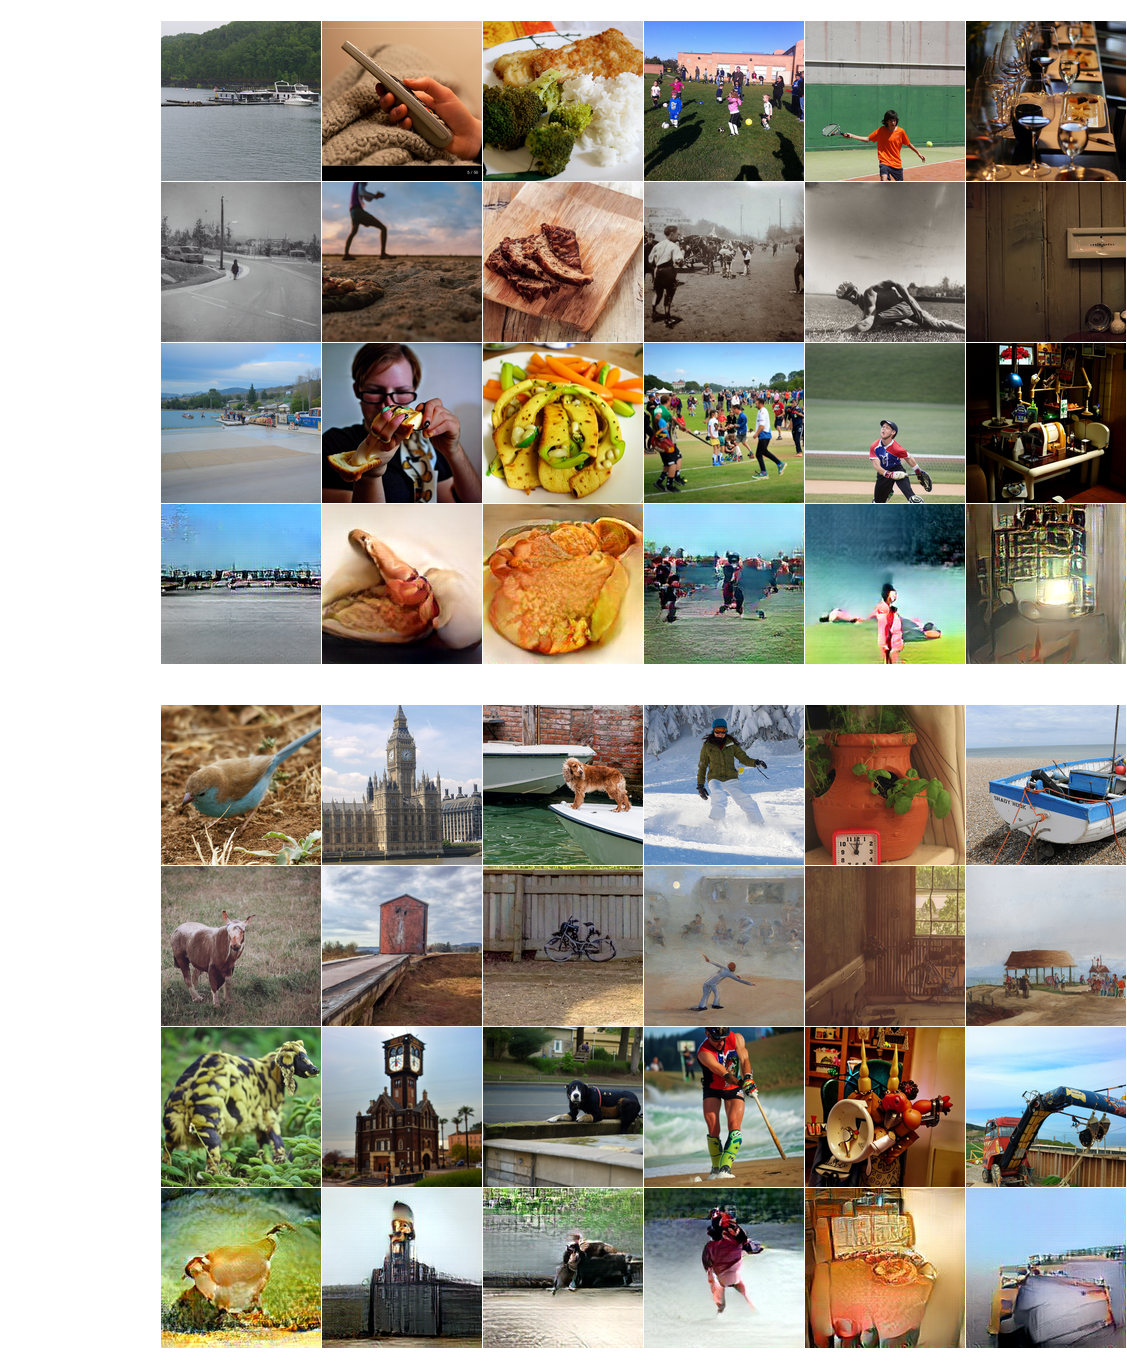

In [35]:
img

In [36]:
# Deeprecon
# reported image selection

true_image_dir = '/home/nu/data/contents_shared/ImageNetTest/source/'
true_image_ext = 'JPEG'
recon_image_ext = 'tiff'

true_image_all = list(np.sort((glob(os.path.join(true_image_dir, '*.' + true_image_ext)))))


selected_images = [ "n01443537_22563", "n01858441_11077","n02139199_10398", "n02690373_7713", "n03710193_22225", "n04252077_10859"]

true_images = [true_image for true_image in true_image_all  if os.path.basename(true_image).split('.')[0] in selected_images ]

In [37]:
# randomly selected images
np.random.seed(1)
true_image_all = list(np.sort((glob(os.path.join(true_image_dir, '*.' + true_image_ext)))))

true_exclude_images = [true_image for true_image in true_image_all  if os.path.basename(true_image).split('.')[0] not in selected_images]

true_images = list(np.sort(np.random.choice(true_exclude_images, 6, replace=False)))
random_selected_images = [os.path.basename(true_image).split('.')[0] for true_image in true_images]
print(len(true_images))

6


In [38]:
recon_path_dict = {
    
    "StableDiffusionReconstruction": "/home/nu/data/contents_shared/ImageNetTest/derivatives/reconstruction/TN_SD_v1_4/img2img/decoded/gen_5_image2imagedeeprecon-fmriprep_trainnoave_testave_fastl2lir_no_vox_select_a1_deeprecon-fmriprep_trainnoave_testave_fastl2lir_no_vox_select_a1/dr-01/VC-VCgen_0/",
    
    "Brain-Diffuser": "/home/nu/data/contents_shared/ImageNetTest/derivatives/reconstruction/versatile_diffusion/vd_doublecond_scaled_pytorch/decoded/deeprecon_testImageNet_trainnoave_testave_fastl2lir_alpha_100000/dr-01/VC/",
    
      "iCNN": "/home/nu/ken.shirakawa/projects/python_KS/python/share_analysis/recon-repro/derivatives/reconstruction/icnn/recon_icnn_image_gd_dist_vgg19_relu7generator_gd_scaling_feature_std_train_mean_center_1000iter/decoded/ImageNetTest/TH/VC/"
  
    }

In [39]:
# save all images 

image_set = [
            {'title': '', 'image_filepath_list': true_images},
        ]

image_path_list = []
for i, (cond_name, recon_path) in enumerate(recon_path_dict.items()):
    print(cond_name)

    recon_images = glob(f'{recon_path}/*.tiff')
    recon_images = [recon_image for recon_image in recon_images  if os.path.basename(recon_image).split('.')[0].split('-')[1] in random_selected_images ]
    #assert 1== 0
    recon_images =list(np.sort(recon_images)) 
    print(len(recon_images))
    image_set.append(
            {'title': "",#f'{cond_name}',
             'image_filepath_list': recon_images},
        )
    

StableDiffusionReconstruction
6
Brain-Diffuser
6
iCNN
6


In [40]:
img = draw_group_image_set(
                image_set,
                max_column_size=6,
               title_left_padding = 0,
           title_fontsize = 18,
              
            )
    
img.save(f'{save_dir}/deeprecon_random.pdf')

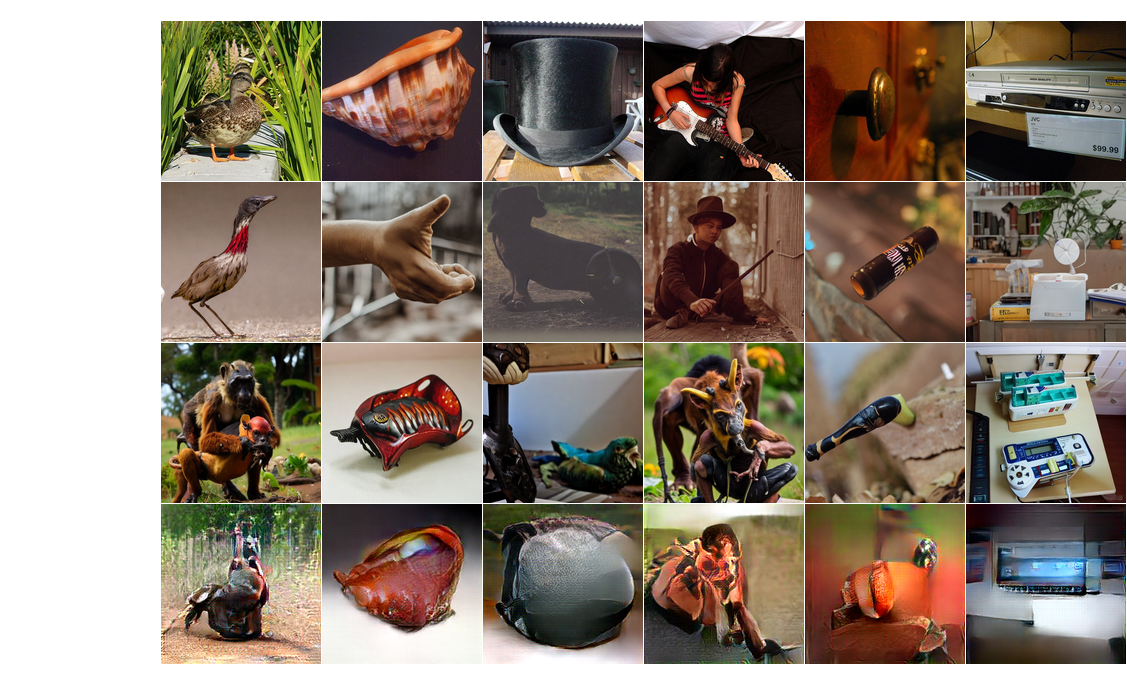

In [41]:
img

In [42]:
#　Artificial Shape image
true_image_dir = '/home/nu/data/contents_shared/ArtificialShapes/source/'
true_image_ext = 'tiff'
recon_image_ext = 'tiff'

true_image_all = list(np.sort((glob(os.path.join(true_image_dir, '*.' + true_image_ext)))))
selected_images = ["colorExpStim01_red_square", "colorExpStim03_red_largering", "colorExpStim04_red_+", "colorExpStim09_green_+", "colorExpStim31_white_square","colorExpStim40_black_X"]
true_images = [true_image for true_image in true_image_all  if os.path.basename(true_image).split('.')[0] in selected_images ]

In [43]:
# randomly selected images
np.random.seed(1)
true_image_all = list(np.sort((glob(os.path.join(true_image_dir, '*.' + true_image_ext)))))

true_exclude_images = [true_image for true_image in true_image_all  if os.path.basename(true_image).split('.')[0] not in selected_images]

true_images = list(np.sort(np.random.choice(true_exclude_images, 6)))
random_selected_images = [os.path.basename(true_image).split('.')[0] for true_image in true_images]
print(len(true_images))

6


In [44]:
recon_path_dict = {
    
    "Takagi and \nNishimoto, 2023": "/home/nu/data/contents_shared/ArtificialShapes/derivatives/reconstruction/TN_SD_v1_4/img2img/decoded/gen_5_image2imagedeeprecon-fmriprep_trainnoave_testave_fastl2lir_no_vox_select_a1_deeprecon-fmriprep_trainnoave_testave_fastl2lir_no_vox_select_a1/dr-01/VC-VCgen_0/",
    
    "Ozcelik and \nVanRullen, 2023 ": "/home/nu/data/contents_shared/ArtificialShapes/derivatives/reconstruction/versatile_diffusion/vd_doublecond_scaled_pytorch/decoded/deeprecon_testArtificialShapes_trainnoave_testave_fastl2lir_alpha_100000/dr-01/VC/",
    
    
    "Shen et al., \n2019": "/home/nu/ken.shirakawa/projects/python_KS/python/share_analysis/recon-repro/derivatives/reconstruction/icnn/recon_icnn_image_gd_dist_vgg19_relu7generator_gd_scaling_feature_std_train_mean_center_1000iter/decoded/ArtificialShapes/TH/VC/"

  
    }

In [45]:
# save all images 

image_set = [
            {'title': '', 'image_filepath_list': true_images},
        ]

image_path_list = []
for i, (cond_name, recon_path) in enumerate(recon_path_dict.items()):
    print(cond_name)

    recon_images = glob(f'{recon_path}/*.tiff')
    recon_images = [recon_image for recon_image in recon_images  if os.path.basename(recon_image).split('.')[0].split('-')[1] in random_selected_images]
    #assert 1== 0
    recon_images =list(np.sort(recon_images)) 
    print(len(recon_images))
    image_set.append(
            {'title': "",#f'{cond_name}',
             'image_filepath_list': recon_images},
        )
    

Takagi and 
Nishimoto, 2023
6
Ozcelik and 
VanRullen, 2023 
6
Shen et al., 
2019
6


In [46]:
img = draw_group_image_set(
                image_set,
                max_column_size=6,
               title_left_padding = 0,
           title_fontsize = 18,
              
            )
img.save(f'{save_dir}/ArtificialShapes_random.pdf')

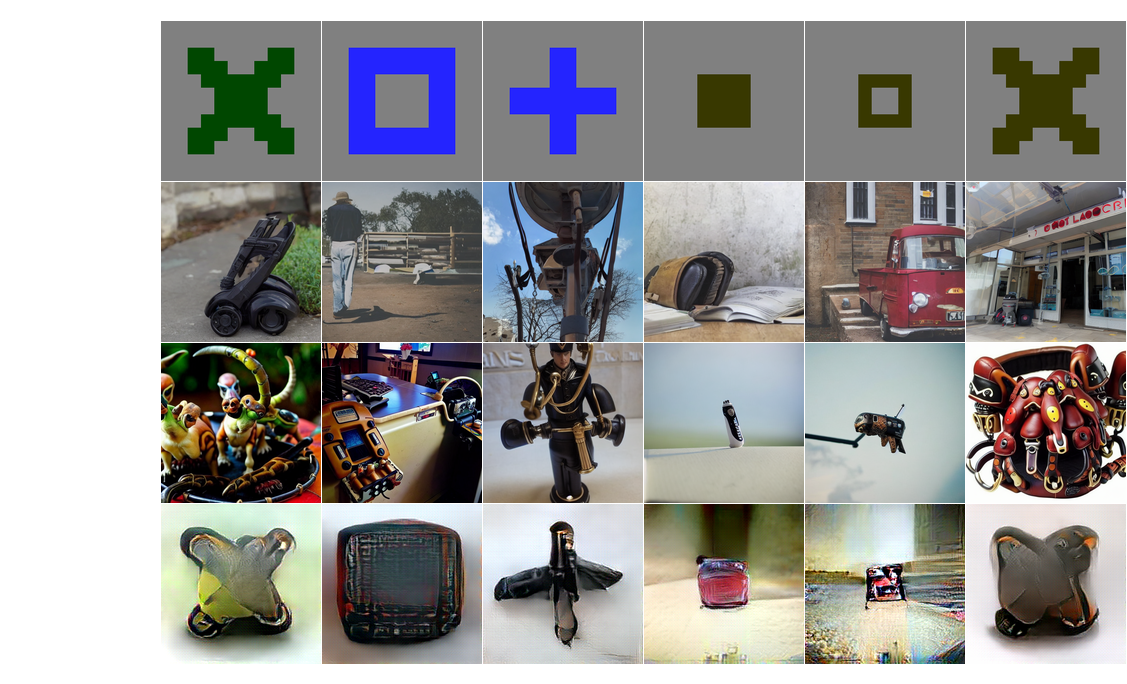

In [47]:
img